In [1]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [2]:
df=df.drop('State',axis=1)


In [3]:
import  numpy as np
df=df.replace(0,np.nan)
df.dropna(inplace=True)

In [4]:
X=df.drop('Profit',axis=1)
y=df['Profit']

<AxesSubplot:>

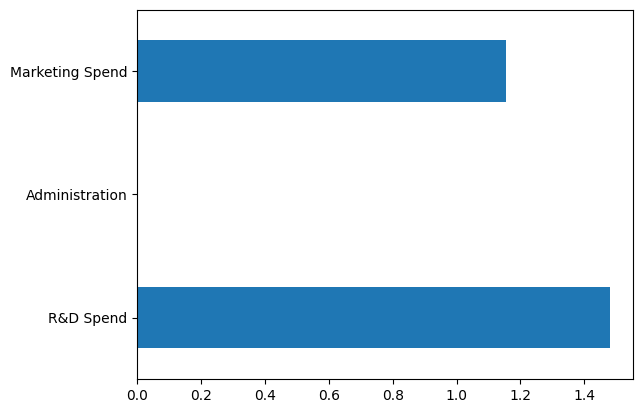

In [123]:
from sklearn.feature_selection import mutual_info_regression
inform=mutual_info_regression(X,y)
fited=pd.Series(inform,df.columns[0:len(df.columns)-1])
fited.plot(kind='barh')

In [19]:
x=X.drop('Administration',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24)

In [17]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Without Feature Selection using Information Gain

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)


0.962838374863139

# With Feature Selection using Information Gain

In [23]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.9619134989626268

### For Classification use:
from sklearn.feature_selection import mutual_info_classif
### and all other steps are same.

In [66]:
from sklearn.feature_selection import SelectKBest,chi2

In [67]:
y=y.astype(int)

In [68]:
chi=SelectKBest(chi2,k=2)
red_fea=chi.fit_transform(X,y)

print('Original size: ',X.shape[1])
print('Reduced row: ',red_fea.shape[1])

Original size:  3
Reduced row:  2


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(red_fea,y,test_size=0.25,random_state=24)

In [70]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.9540450597868936

## Chi Square Test not works for negative X variables and  for float y variable.

C:\Python310\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<AxesSubplot:>

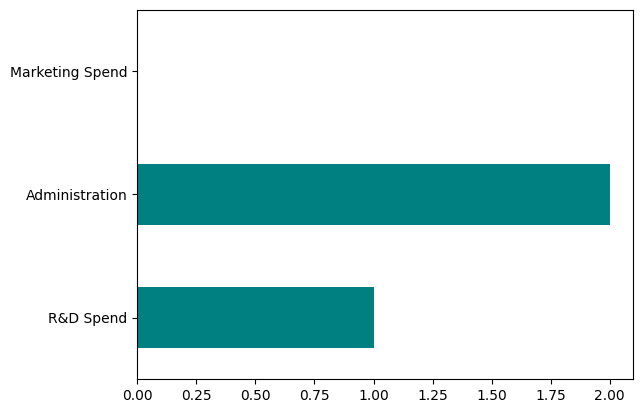

In [80]:
X=X+1
from skfeature.function.similarity_based import fisher_score
inform=fisher_score.fisher_score(X.to_numpy(),y.to_numpy(),mode='rank')
fited=pd.Series(inform,df.columns[0:len(df.columns)-1])
fited.plot(kind='barh',color='teal')

In [57]:
x=X.drop('R&D Spend',axis=1)

In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.4724149830178621

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

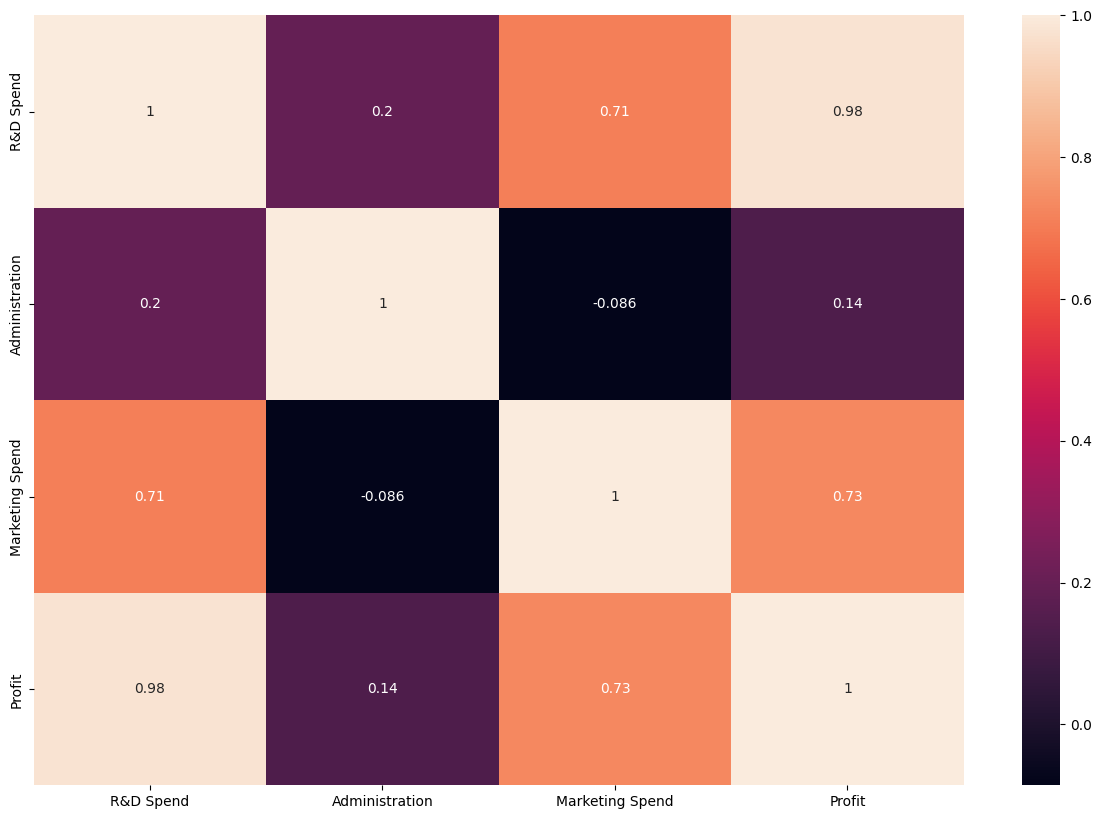

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<BarContainer object of 3 artists>

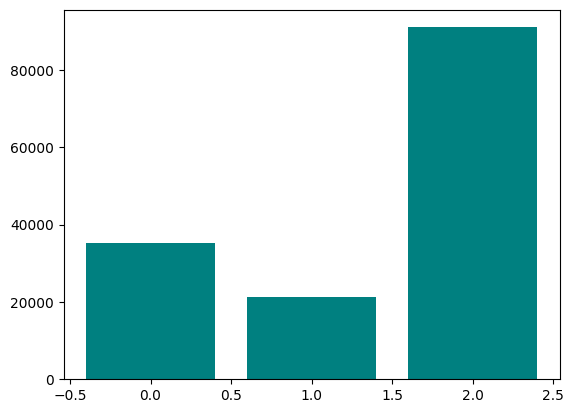

In [78]:
mean_absolute_difference=np.sum(np.abs(X -np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mean_absolute_difference,color='teal')

<BarContainer object of 3 artists>

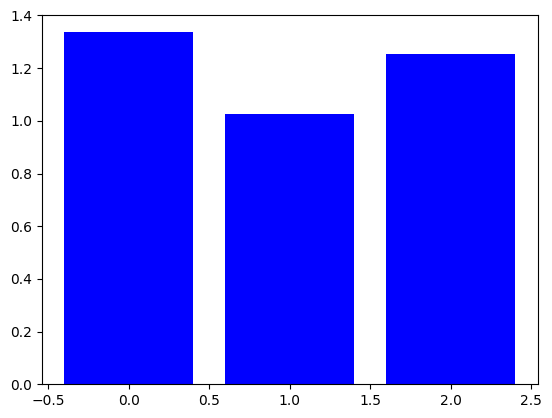

In [79]:
x=X+1 # too avoid denominator to be zero
#Arithmetic Mean
am=np.mean(x,axis=0)
#Geometric Mean 
gm=np.power(np.prod(x,axis=0),1/x.shape[0])
#ratio of arithmetic mean  and geometric mean
disp_ratio=am/gm
plt.bar(np.arange(X.shape[1]),disp_ratio,color='blue')

In [19]:
from  mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [14]:
knn=KNeighborsRegressor()

In [15]:
from sklearn.feature_selection import RFE

In [16]:
rfe=RFE(SVR(kernel="linear"),n_features_to_select=2)
rfe.fit(X_train,y_train)
y_pred=rfe.predict(X_test)
r2_score(y_test,y_pred)

0.9706413599083761

In [50]:
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [51]:
rfe=RFE(lr,n_features_to_select=8)
rfe.fit(X,y)
y_pred=rfe.predict(X)
r2_score(y,y_pred)

0.9608231830180131

In [52]:
from sklearn.feature_selection import SelectFromModel

In [53]:
model=SelectFromModel(lr)
model = model.fit(X, y) 
status = model.get_support()
print("Selection status: ", status)

Selection status:  [ True False False]


In [54]:
X_new=model.transform(X) 
X_new.shape[1]

1

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.954906597888596

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=24)

In [58]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.9578449478413669